In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Match_Result_Data_New.csv')
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,fk,pk,pkatt,season,team,day_code
0,2020-09-21,20.0,Matchweek 2,Mon,Away,W,3.0,1.0,Wolves,1.9,1.0,65.0,13.0,8.0,2.0,1.0,1.0,2021,Manchester City,0
1,2020-09-27,16.0,Matchweek 3,Sun,Home,L,2.0,5.0,Leicester City,0.9,2.6,72.0,16.0,5.0,1.0,0.0,0.0,2021,Manchester City,6
2,2020-10-03,17.0,Matchweek 4,Sat,Away,D,1.0,1.0,Leeds United,1.5,1.7,48.0,23.0,1.0,1.0,0.0,0.0,2021,Manchester City,5
3,2020-10-17,17.0,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,1.5,0.9,59.0,13.0,5.0,0.0,0.0,0.0,2021,Manchester City,5
4,2020-10-24,12.0,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,1.1,0.5,70.0,14.0,7.0,1.0,0.0,0.0,2021,Manchester City,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,2024-05-02,19.0,Matchweek 26,Thu,Home,W,2.0,0.0,Tottenham,2.2,1.6,37.0,16.0,4.0,2.0,0.0,0.0,2023,Chelsea,3
1613,2024-05-05,14.0,Matchweek 36,Sun,Home,W,5.0,0.0,West Ham,4.1,0.9,69.0,25.0,14.0,1.0,0.0,0.0,2023,Chelsea,6
1614,2024-05-11,17.0,Matchweek 37,Sat,Away,W,3.0,2.0,Nott'ham Forest,1.6,1.5,67.0,12.0,5.0,1.0,0.0,0.0,2023,Chelsea,5
1615,2024-05-15,19.0,Matchweek 34,Wed,Away,W,2.0,1.0,Brighton,1.5,1.3,45.0,14.0,6.0,2.0,0.0,0.0,2023,Chelsea,2


In [4]:
df["date"] = pd.to_datetime(df["date"])
df["day_code"] = df["date"].dt.dayofweek

In [5]:
df["venue_code"] = df["venue"].astype("category").cat.codes
df["opp_code"] = df["opponent"].astype("category").cat.codes
df["team_code"] = df["team"].astype("category").cat.codes

In [6]:
label_encoding = {'W': 1, 'L': 2, 'D': 0}
df['result'] = df['result'].map(label_encoding)

# Display the DataFrame
df.head(5)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,sot,fk,pk,pkatt,season,team,day_code,venue_code,opp_code,team_code
0,2020-09-21,20.0,Matchweek 2,Mon,Away,1,3.0,1.0,Wolves,1.9,...,8.0,2.0,1.0,1.0,2021,Manchester City,0,0,25,12
1,2020-09-27,16.0,Matchweek 3,Sun,Home,2,2.0,5.0,Leicester City,0.9,...,5.0,1.0,0.0,0.0,2021,Manchester City,6,1,11,12
2,2020-10-03,17.0,Matchweek 4,Sat,Away,0,1.0,1.0,Leeds United,1.5,...,1.0,1.0,0.0,0.0,2021,Manchester City,5,0,10,12
3,2020-10-17,17.0,Matchweek 5,Sat,Home,1,1.0,0.0,Arsenal,1.5,...,5.0,0.0,0.0,0.0,2021,Manchester City,5,1,0,12
4,2020-10-24,12.0,Matchweek 6,Sat,Away,0,1.0,1.0,West Ham,1.1,...,7.0,1.0,0.0,0.0,2021,Manchester City,5,0,24,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1617 non-null   datetime64[ns]
 1   time        1617 non-null   float64       
 2   round       1617 non-null   object        
 3   day         1617 non-null   object        
 4   venue       1617 non-null   object        
 5   result      1617 non-null   int64         
 6   gf          1617 non-null   float64       
 7   ga          1617 non-null   float64       
 8   opponent    1617 non-null   object        
 9   xg          1617 non-null   float64       
 10  xga         1617 non-null   float64       
 11  poss        1617 non-null   float64       
 12  sh          1617 non-null   float64       
 13  sot         1617 non-null   float64       
 14  fk          1617 non-null   float64       
 15  pk          1617 non-null   float64       
 16  pkatt       1617 non-nul

In [8]:
X = df[['day_code', 'venue_code', 'opp_code', 'team_code', 'gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'fk']].values
y = df['result']  # Target column



In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train SVM classifier
svm_model = SVC(probability=True)  # Enable probability estimates
svm_model.fit(X_train, y_train)

# Calculate distances to the SVM decision boundary
decision_function = svm_model.decision_function(X_train)
complexity_scores = np.abs(decision_function)  # Absolute values as complexity scores

Matplotlib created a temporary cache directory at C:\Users\Pritika\AppData\Local\Temp\matplotlib-z15pimw4 because the default path (C:\Users\Pritika\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


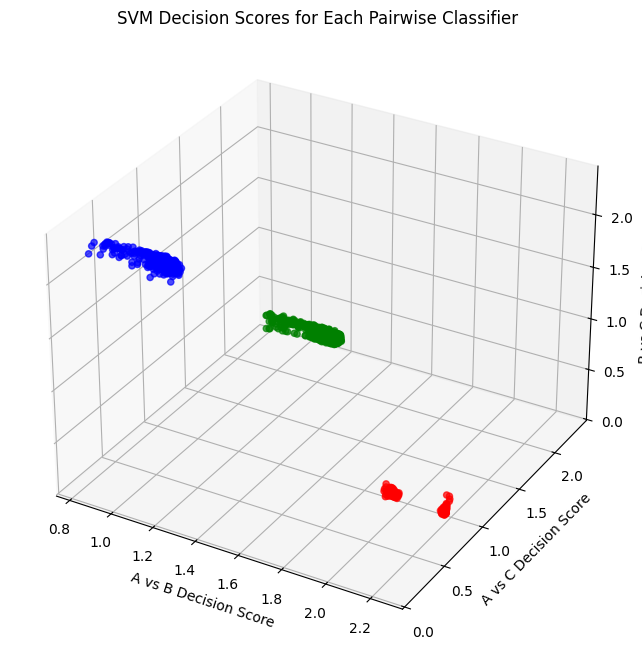

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Get the decision scores for each one-vs-one classifier
decision_scores = svm_model.decision_function(X_train)  # This gives an (n_samples, 3) array for 3 classes

# Extract scores for each pairwise classifier
score_A_vs_B = complexity_scores[:, 0]
score_A_vs_C = complexity_scores[:, 1]
score_B_vs_C = complexity_scores[:, 2]

# Define colors for each class in y_test (assuming classes are 0, 1, and 2)
colors = np.where(y_train == 0, 'r', np.where(y_train == 1, 'g', 'b'))

# 3D Scatter plot of decision scores
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each class with a different color
ax.scatter(score_A_vs_B, score_A_vs_C, score_B_vs_C, c=colors, marker='o', alpha=0.7)

# Labeling the axes
ax.set_xlabel('A vs B Decision Score')
ax.set_ylabel('A vs C Decision Score')
ax.set_zlabel('B vs C Decision Score')
plt.title('SVM Decision Scores for Each Pairwise Classifier')

plt.show()


In [12]:
# Define a threshold for complexity (you may need to adjust this)
threshold = np.percentile(complexity_scores, 75)  # For example, top 25% as high complexity

# Get low and high complexity samples
high_complexity_indices = np.where(complexity_scores < threshold)[0]
low_complexity_indices = np.where(complexity_scores >= threshold)[0]

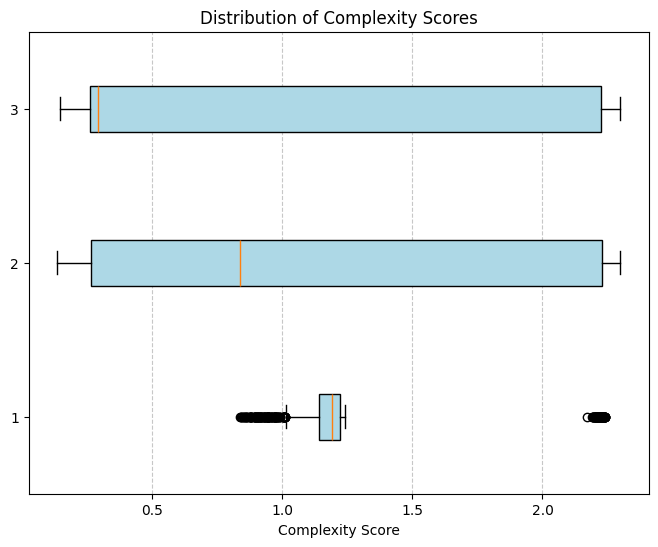

In [13]:

# Assuming 'complexity_scores' is already calculated from the SVM decision function
plt.figure(figsize=(8, 6))
plt.boxplot(complexity_scores, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Adding labels and title
plt.title("Distribution of Complexity Scores")
plt.xlabel("Complexity Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [14]:
# Make predictions for low-complexity data
low_complexity_predictions = svm_model.predict(X_train[low_complexity_indices])


In [15]:
class NeighborWeightedTreeEnsemble:
    def __init__(self, n_neighbors=5, n_estimators=10, max_depth=None):
        self.n_neighbors = n_neighbors
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.knn = KNeighborsClassifier(n_neighbors=self.n_neighbors, metric='euclidean')
        self.models = []
    
    def fit(self, X, y):
        # Fit KNN to find neighbors for each sample
        self.knn.fit(X, y)
        
        # Store the models for each training sample
        for i in range(len(X)):
            # Find neighbors for the current sample
            neighbors = self.knn.kneighbors([X[i]], return_distance=False)[0]
            # Extract neighbor samples and labels using indices from neighbors
            X_neighbors = X[neighbors]
            y_neighbors = y.iloc[neighbors]  # Use iloc for correct indexing
            
            # Train a Random Forest model on these neighbors
            model = RandomForestClassifier(n_estimators=self.n_estimators, max_depth=self.max_depth)
            model.fit(X_neighbors, y_neighbors)
            self.models.append(model)
    
    def predict(self, X):
        predictions = []
        
        for x in X:
            # Find neighbors for each test instance
            neighbors = self.knn.kneighbors([x], return_distance=False)[0]
            # Collect weighted predictions from the corresponding models
            neighbor_preds = []
            for neighbor in neighbors:
                pred = self.models[neighbor].predict([x])[0]
                neighbor_preds.append(pred)
            
            # Take the most common prediction as final prediction
            final_pred = Counter(neighbor_preds).most_common(1)[0][0]
            predictions.append(final_pred)
        
        return np.array(predictions)



In [16]:
nwte = NeighborWeightedTreeEnsemble(n_neighbors=10, n_estimators=10, max_depth=3)
nwte.fit(X_train[high_complexity_indices], y_train.iloc[high_complexity_indices])

In [17]:
high_complexity_predictions = nwte.predict(X_train[high_complexity_indices])

In [18]:
combined_predictions = np.full(y_train.shape, fill_value=np.nan)

# Assign low complexity predictions
combined_predictions[low_complexity_indices] = low_complexity_predictions

# Assign high complexity predictions
combined_predictions[high_complexity_indices] = high_complexity_predictions

# Convert combined predictions to integers if necessary
combined_predictions = np.nan_to_num(combined_predictions, nan=-1)

In [19]:
# Evaluate on the test set
test_complexity_scores = np.abs(svm_model.decision_function(X_test))
test_high_complexity_indices = np.where(test_complexity_scores < threshold)[0]
test_low_complexity_indices = np.where(test_complexity_scores >= threshold)[0]

# Make predictions for the test set
test_low_complexity_predictions = svm_model.predict(X_test[test_low_complexity_indices])
test_high_complexity_predictions = nwte.predict(X_test[test_high_complexity_indices])

# Combine test predictions
test_combined_predictions = np.full(y_test.shape, fill_value=np.nan)
test_combined_predictions[test_low_complexity_indices] = test_low_complexity_predictions
test_combined_predictions[test_high_complexity_indices] = test_high_complexity_predictions
test_combined_predictions = np.nan_to_num(test_combined_predictions, nan=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_combined_predictions)
print(f'Accuracy of the Support-Tree Ensemble model: {accuracy:.2f}')

Accuracy of the Support-Tree Ensemble model: 0.66


In [20]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, test_combined_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.44      0.38        73
           1       0.77      0.77      0.77       125
           2       0.83      0.69      0.75       126

    accuracy                           0.66       324
   macro avg       0.65      0.63      0.63       324
weighted avg       0.70      0.66      0.68       324



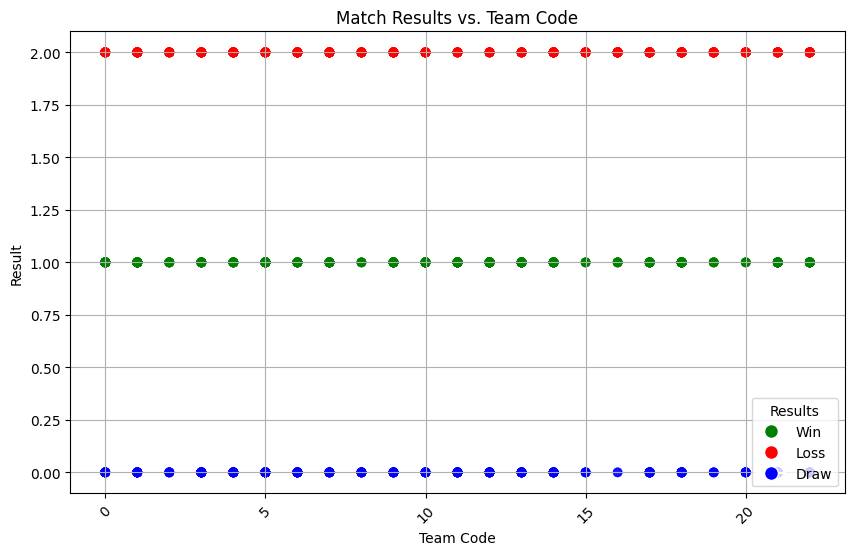

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your DataFrame 'df' and have defined X and y
X = df[['day_code', 'venue_code', 'opp_code', 'team_code', 'gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'fk']].values
y = df['result'].values  # Ensure y is a numpy array

# Extract team_code from X
team_code = X[:, 3]  # Assuming team_code is the 4th column in your X

# Create a color map for results
color_map = {1: 'green', 2: 'red', 0: 'blue'}

# Assign colors based on results in y
colors = [color_map[result] for result in y]

# Create a scatter plot of results vs. team_code
plt.figure(figsize=(10, 6))
scatter = plt.scatter(team_code, y, c=colors, alpha=0.7)
plt.title('Match Results vs. Team Code')
plt.xlabel('Team Code')
plt.ylabel('Result')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Win', markerfacecolor='green', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Loss', markerfacecolor='red', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Draw', markerfacecolor='blue', markersize=10)]
plt.legend(handles=handles, title="Results")

plt.grid()
plt.show()


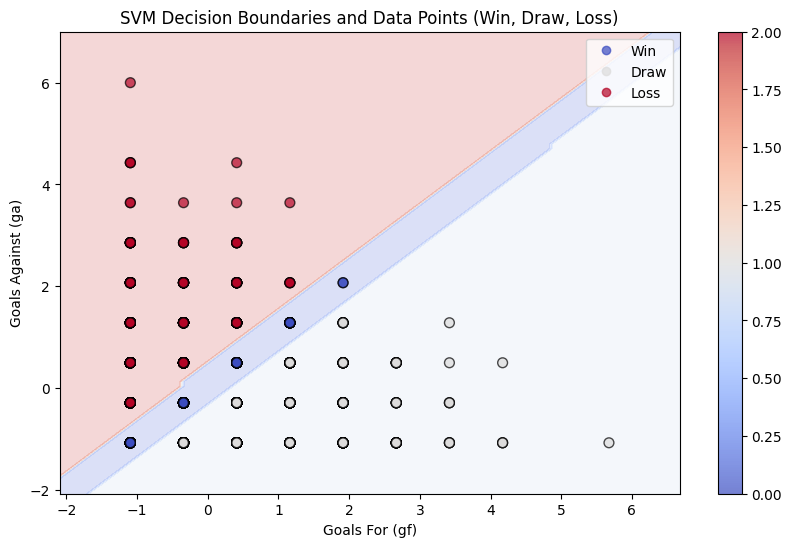

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Selecting two features for visualization (e.g., 'gf' and 'ga')
X_vis = df[['gf', 'ga']].values
y = df['result']  # Target column: win, draw, loss

# Standardize the features
scaler = StandardScaler()
X_vis = scaler.fit_transform(X_vis)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train the SVM model (we'll use a linear kernel for simplicity)
svm_model = SVC(kernel='linear', decision_function_shape='ovr', probability=True)
svm_model.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class labels on the mesh grid to get the decision boundary
Z_labels = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_labels = Z_labels.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_labels, cmap='coolwarm', alpha=0.2)

# Plot the original data points
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.colorbar(scatter)

# Plot the SVM hyperplane and margins (decision boundaries) manually if needed
# For multi-class, the direct hyperplane visualization is more complex, so this approach works for understanding classification regions.

# Labels and title
plt.title("SVM Decision Boundaries and Data Points (Win, Draw, Loss)")
plt.xlabel("Goals For (gf)")
plt.ylabel("Goals Against (ga)")
plt.legend(handles=scatter.legend_elements()[0], labels=['Win', 'Draw', 'Loss'])
plt.show()


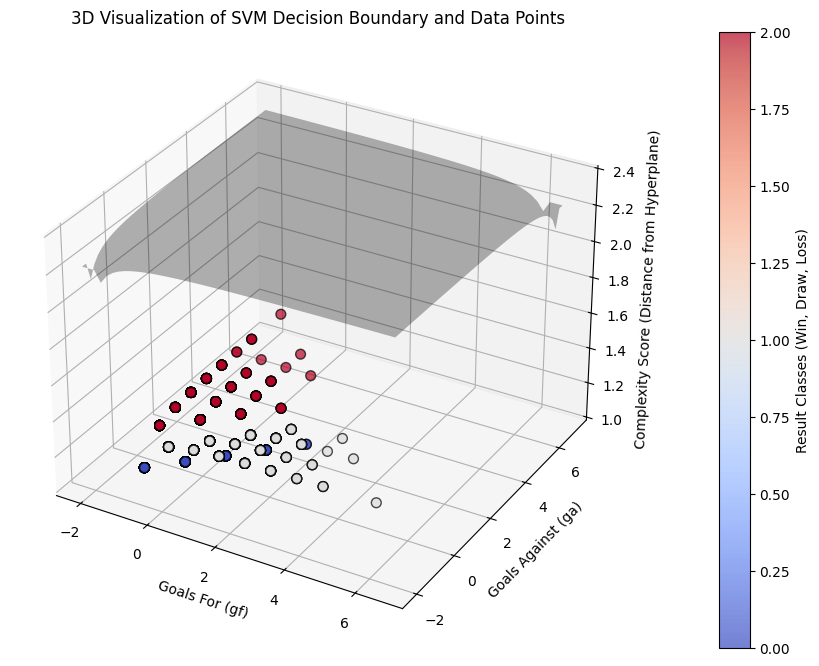

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Selecting two features for 3D visualization
X_vis = df[['gf', 'ga']].values
y = df['result']  # Target column: win, draw, loss

# Standardize the features
scaler = StandardScaler()
X_vis = scaler.fit_transform(X_vis)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train the SVM model with one-vs-rest approach
svm_model = SVC(kernel='linear', decision_function_shape='ovr', probability=True)
svm_model.fit(X_train, y_train)

# Calculate decision function values to represent complexity scores
decision_function = svm_model.decision_function(X_vis)
complexity_scores = np.abs(decision_function).mean(axis=1)  # Average score per class for visualization

# 3D plot setup
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each class with a different color
scatter = ax.scatter(X_vis[:, 0], X_vis[:, 1], complexity_scores, c=y, cmap='coolwarm', s=50, edgecolor='k', alpha=0.7)

# Create a mesh grid for decision boundary plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

# Calculate decision boundary on the mesh grid
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# For visualization, use the max decision boundary (one-vs-rest approach)
if Z.ndim > 1:
    Z = Z.max(axis=1)  # Take the maximum across classes

Z = Z.reshape(xx.shape)

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, color='black', alpha=0.3, rstride=100, cstride=100)

# Customize plot
ax.set_title("3D Visualization of SVM Decision Boundary and Data Points")
ax.set_xlabel("Goals For (gf)")
ax.set_ylabel("Goals Against (ga)")
ax.set_zlabel("Complexity Score (Distance from Hyperplane)")
plt.colorbar(scatter, ax=ax, pad=0.1, label='Result Classes (Win, Draw, Loss)')

plt.show()



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1617 non-null   object 
 1   time      1617 non-null   float64
 2   round     1617 non-null   object 
 3   day       1617 non-null   object 
 4   venue     1617 non-null   object 
 5   result    1617 non-null   object 
 6   gf        1617 non-null   float64
 7   ga        1617 non-null   float64
 8   opponent  1617 non-null   object 
 9   xg        1617 non-null   float64
 10  xga       1617 non-null   float64
 11  poss      1617 non-null   float64
 12  sh        1617 non-null   float64
 13  sot       1617 non-null   float64
 14  fk        1617 non-null   float64
 15  pk        1617 non-null   float64
 16  pkatt     1617 non-null   float64
 17  season    1617 non-null   int64  
 18  team      1617 non-null   object 
 19  day_code  1617 non-null   int64  
dtypes: float64(11), int64(2), obje